In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass
import pandas as pd
pd.options.display.max_colwidth = 1000
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "drive/MyDrive/Cours_M2/appr_stat/french_tweets_100K.csv"

In [ ]:
df = pd.read_csv(filepath_or_buffer= url, encoding = 'latin9', sep = ',')
df

,label,text
0,0,Je pense que je devrais embaucher un de ces tranlateurs ... parce que personne ne m'a jamais compris ...
1,0,"Et la pauvre ruth, vous voulez des tissus?"
2,1,- a dessinÃ© une carte pour vous - 6 baguettes - connu comme le seigneur de la victoire. Que puis-je dire? Les doigts croisÃ©s pour vous
3,0,"Mcfly 7 / juin / 2009 au Mexique, la grippe porcine le dÃ©truit tout! Est le coupable! C'est sa faute! D: gosh! Je suis trÃšs Ã©loignÃ©!"
4,1,"Bon, l'hummer sort des rues - il faut que les voitures se dÃ©placent Ã bon marchÃ© et efficacement - pas les dÃ©clarations de l'ego"
...,...,...
99995,0,"Wow cafe dans la matinÃ©e, je suis tellement Ã©veillÃ©, mais j'ai hÃ¢te Ã Starbucks"
99996,1,Les cheveux ne coopÃšrent pas: / mais j'aime le ruban vert
99997,1,toutes nos fÃ©licitations
99998,0,"Non, tu me manques encore, comment Ã©tait le dernier jour d'Ã©cole?"


In [ ]:
stp_words = stopwords.words('french')
print(stp_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
def TweetCleaning(tweet):
    # Supprimer les noms d'utilisateur Twitter
    sentence = re.sub(r"@[a-zA-Z0-9]+", "", tweet)

    # Supprimer les hashtags Twitter
    sentence = re.sub(r"#[a-zA-Z0-9\s]+", "", tweet)

    # Supprimer les dates au format "jour / mois / année"
    sentence = re.sub(r"\b\d+\s*[/\-]\s*\d+\s*[/\-]\s*\d+\b", "", sentence)

    # Décode le texte en utilisant le codec latin-1
    sentence = sentence.encode('latin-1', 'ignore').decode('utf-8', 'ignore')

    # Nettoyer les caractères spéciaux et les espaces excessifs
    sentence = re.sub(r"[^\w\s]", "", sentence)
    sentence = re.sub(r"\s+", " ", sentence)

    # Convertir en minuscules
    sentence = sentence.lower()

    return sentence.strip()


def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    else:
        return "negative"


In [ ]:
df['cleanedTweets'] = df['text'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,label,text,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,0,Je pense que je devrais embaucher un de ces tranlateurs ... parce que personne ne m'a jamais compris ...,je pense que je devrais embaucher un de ces tranlateurs parce que personne ne ma jamais compris,0.0,0.0,negative
1,0,"Et la pauvre ruth, vous voulez des tissus?",et la pauvre ruth vous voulez des tissus,0.0,0.0,negative
2,1,- a dessinÃ© une carte pour vous - 6 baguettes - connu comme le seigneur de la victoire. Que puis-je dire? Les doigts croisÃ©s pour vous,a dessiné une carte pour vous 6 baguettes connu comme le seigneur de la victoire que puisje dire les doigts croisés pour vous,0.0,0.0,negative
3,0,"Mcfly 7 / juin / 2009 au Mexique, la grippe porcine le dÃ©truit tout! Est le coupable! C'est sa faute! D: gosh! Je suis trÃšs Ã©loignÃ©!",mcfly 7 juin 2009 au mexique la grippe porcine le détruit tout est le coupable cest sa faute d gosh je suis trs éloigné,0.0,0.0,negative
4,1,"Bon, l'hummer sort des rues - il faut que les voitures se dÃ©placent Ã bon marchÃ© et efficacement - pas les dÃ©clarations de l'ego",bon lhummer sort des rues il faut que les voitures se déplacent à bon marché et efficacement pas les déclarations de lego,0.0,0.0,negative


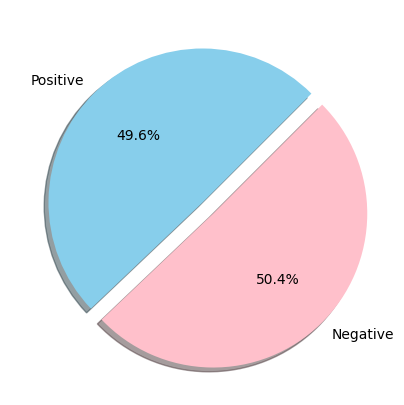

In [ ]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=df[df['label']==1]
neg=df[df['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

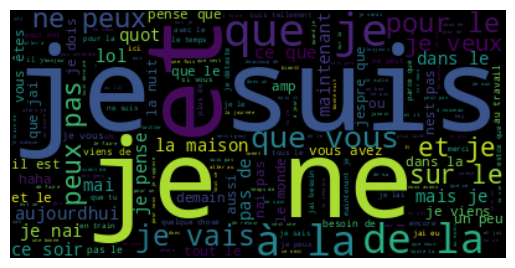

In [ ]:
consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Positive words are as follows


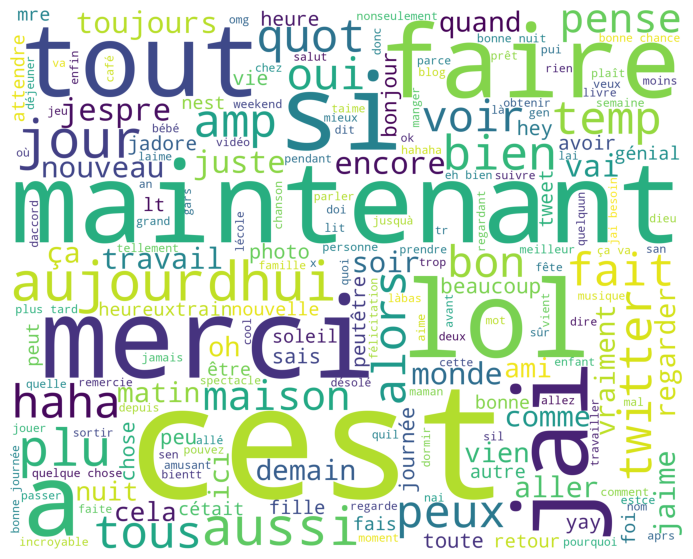

Negative words are as follows


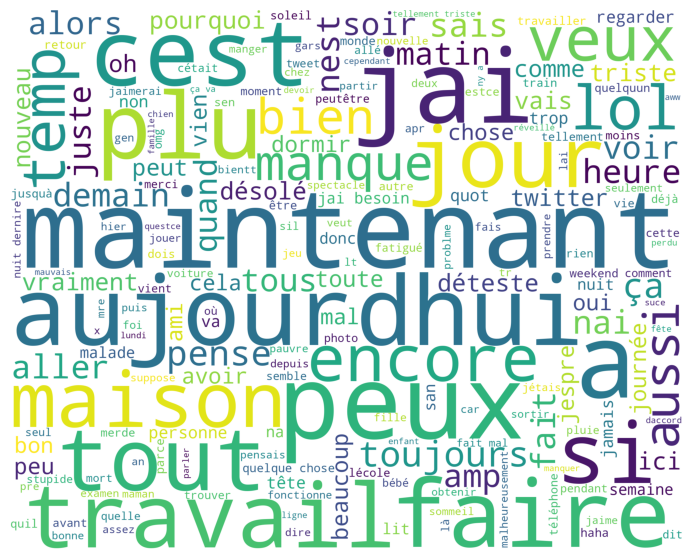

In [ ]:
from wordcloud import WordCloud
positivedata = df[ df['label'] == 1]
positivedata =positivedata['cleanedTweets']
negdata = df[df['label'] == 0]
negdata= negdata['cleanedTweets']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stp_words,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)


#Text avec les tweets nettoyés

In [ ]:
# Division des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(df['cleanedTweets'], df['label'], test_size=0.1, random_state=42)

# Vectorisation des tweets en utilisant TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('french'))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import time

models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Entraînement et évaluation des modèles
results = {}
for name, model in models.items():
    start_time = time.time()  # Mesure du temps de début
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    end_time = time.time()  # Mesure du temps de fin
    execution_time = end_time - start_time  # Calcul du temps d'exécution

    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "execution_time": execution_time  # Ajout du temps d'exécution aux résultats
    }

# Affichage des résultats
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Execution Time: {result['execution_time']} seconds")
    print(f"Classification Report:\n{result['classification_report']}\n")


Model: Naive Bayes
Accuracy: 0.7528
Execution Time: 0.07460451126098633 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      4999
           1       0.76      0.74      0.75      5001

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000


Model: Support Vector Machine
Accuracy: 0.7649
Execution Time: 1370.5034589767456 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4999
           1       0.76      0.78      0.77      5001

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000


Model: Logistic Regression
Accuracy: 0.7595
Execution Time: 0.5508198738098145 seconds
Classification Report:
              prec

Text avec les tweets non nettoyés

In [ ]:
# Division des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.1, random_state=42)

# Vectorisation des tweets en utilisant TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('french'))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:

models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Entraînement et évaluation des modèles
results = {}
for name, model in models.items():
    start_time = time.time()  # Mesure du temps de début
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    end_time = time.time()  # Mesure du temps de fin
    execution_time = end_time - start_time  # Calcul du temps d'exécution

    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "execution_time": execution_time  # Ajout du temps d'exécution aux résultats
    }

# Affichage des résultats
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Execution Time: {result['execution_time']} seconds")
    print(f"Classification Report:\n{result['classification_report']}\n")


Model: Naive Bayes
Accuracy: 0.74125
Execution Time: 0.08167767524719238 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     10068
           1       0.75      0.73      0.74      9932

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000


Model: Support Vector Machine
Accuracy: 0.7572
Execution Time: 1111.1661398410797 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75     10068
           1       0.75      0.77      0.76      9932

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000


Model: Logistic Regression
Accuracy: 0.753
Execution Time: 0.6601314544677734 seconds
Classification Report:
              prec

In [ ]:
from sklearn.metrics import roc_curve, auc
models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Entraînement et évaluation des modèles avec prédiction de probabilité pour la courbe ROC
results = {}
roc_fig, roc_ax = plt.subplots()

for name, model in models.items():
    start_time = time.time()  # Mesure du temps de début
    model.fit(X_train_tfidf, y_train)
    y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilité de la classe positive
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    end_time = time.time()  # Mesure du temps de fin
    execution_time = end_time - start_time  # Calcul du temps d'exécution

    # Conversion en minutes et secondes
    minutes = int(execution_time // 60)
    seconds = execution_time % 60

    results[name] = {
        "execution_time": {
            "minutes": minutes,
            "seconds": seconds
        }
    }

# Affichage des courbes ROC
roc_ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
roc_ax.set_xlim([0.0, 1.0])
roc_ax.set_ylim([0.0, 1.05])
roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('Receiver Operating Characteristic')
roc_ax.legend(loc='lower right')
plt.show()


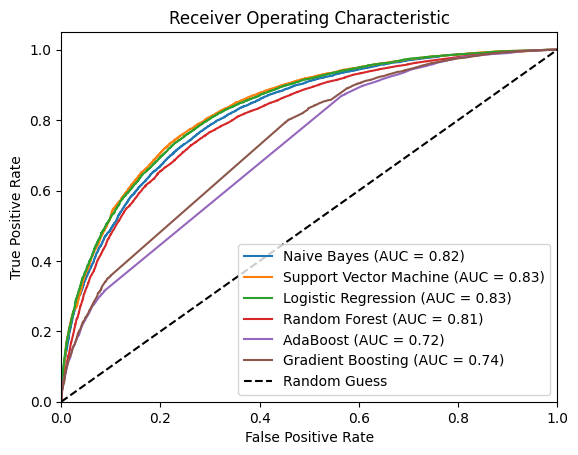

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import time
from sklearn.metrics import roc_curve, auc
models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Entraînement et évaluation des modèles avec prédiction de probabilité pour la courbe ROC
results = {}
roc_fig, roc_ax = plt.subplots()

for name, model in models.items():
    start_time = time.time()  # Mesure du temps de début
    model.fit(X_train_tfidf, y_train)
    y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilité de la classe positive
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    end_time = time.time()  # Mesure du temps de fin
    execution_time = end_time - start_time  # Calcul du temps d'exécution

    # Conversion en minutes et secondes
    minutes = int(execution_time // 60)
    seconds = execution_time % 60

    results[name] = {
        "execution_time": {
            "minutes": minutes,
            "seconds": seconds
        }
    }

# Affichage des courbes ROC
roc_ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
roc_ax.set_xlim([0.0, 1.0])
roc_ax.set_ylim([0.0, 1.05])
roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('Receiver Operating Characteristic')
roc_ax.legend(loc='lower right')
plt.show()
